> Игорь Сорочан DSU-31

# Домашнее задание `"Итоговая работа"`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
import sympy as sp # SymPy is a Python library for symbolic mathematics. 
# from sympy import *

%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
### YOUR CODE HERE
x = sp.Symbol('x')  # define x as analitycal parameter
func = sp.tan(sp.sin(x) + sp.cos(2*x+3))**2
func

tan(sin(x) + cos(2*x + 3))**2

In [3]:
res = sp.diff(func, x) #  first derivative with respect to x in algebraic form
res

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [4]:
# first derivative at x=1
# res.subs(x,1).evalf(5) #  change 'x' to 1 
# Evaluate the given formula to an accuracy of *n* digits
res.evalf(subs={x:1}, n= 5)

55.386

## Задание 2

Дан объект в $2D$ пространстве

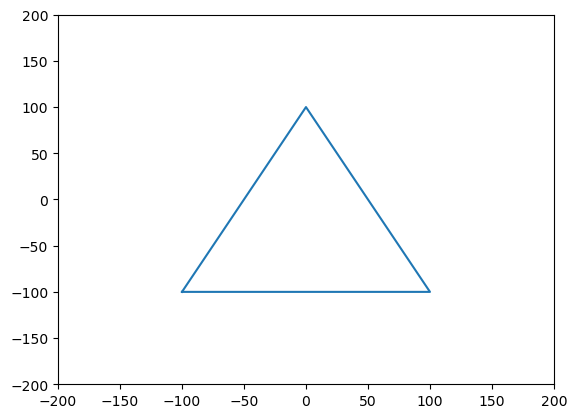

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 
plt.show()

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций).  
Масштабирование на (0.5, 1.2) и смещение на (200, 300)


![](https://www.alanzucconi.com/wp-content/uploads/2016/02/2D_affine_transformation_matrix.svg_.png)

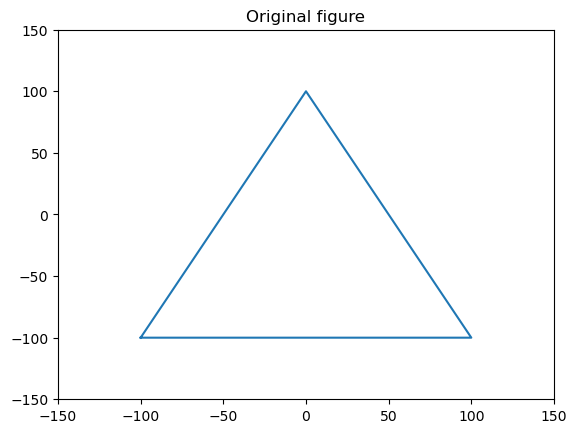

In [6]:
### YOUR CODE HERE
# defining printing function
def print_lintransf(matr, x1 = -150, x2 = 150, y1 = -150, y2 = 150):
    x = matr[:,0]
    y = matr[:,1]
    plt.plot(x,y)
    plt.xlim([x1, x2])
    plt.ylim([y1, y2])

print_lintransf(A)
plt.title("Original figure")
plt.show()

In [7]:
# the given object 
Matrix(A)

Matrix([
[-100, -100, 1],
[   0,  100, 1],
[ 100, -100, 1],
[-100, -100, 1]])

![](http://eor.dgu.ru/lectures_f/%D0%9A%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D1%86%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F_%D0%B8_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0_%D0%93%D0%B0%D0%B4%D0%B6%D0%B8%D0%B5%D0%B2_%D0%90_%D0%9C/%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_2.files/image273.png)  
Scaling matrix: 
* x: a
* y: d

In [8]:
# scaling along x by 0.5 and along y by 1.2
scaling_matr = np.diagflat(np.array([1.]*3))
scaling_matr[0][0] = 0.5
scaling_matr[1][1] = 1.2

Matrix(scaling_matr)

Matrix([
[0.5,   0,   0],
[  0, 1.2,   0],
[  0,   0, 1.0]])

In [9]:
Matrix( A @ scaling_matr ) # output scaled object in matrix form

Matrix([
[-50.0, -120.0, 1.0],
[    0,  120.0, 1.0],
[ 50.0, -120.0, 1.0],
[-50.0, -120.0, 1.0]])

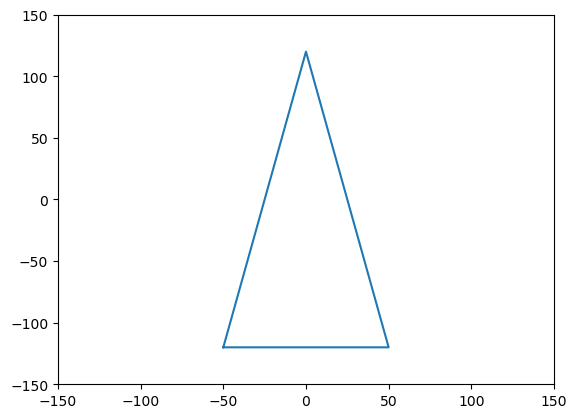

In [10]:
# print scaled matrix
print_lintransf(A @ scaling_matr )

![](http://eor.dgu.ru/lectures_f/%D0%9A%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D1%86%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F_%D0%B8_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0_%D0%93%D0%B0%D0%B4%D0%B6%D0%B8%D0%B5%D0%B2_%D0%90_%D0%9C/%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_2.files/image289.png)  

Translation matrix:  
* x: m
* y: n

In [11]:
transl_matr = np.diagflat(np.array([1.]*3))
transl_matr[2][0] = 200
transl_matr[2][1] = 300

Matrix(transl_matr)

Matrix([
[  1.0,     0,   0],
[    0,   1.0,   0],
[200.0, 300.0, 1.0]])

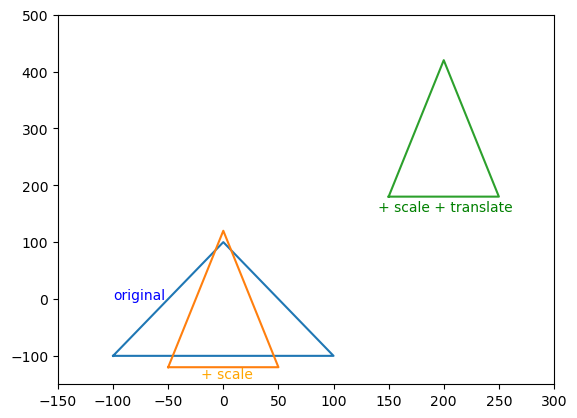

In [12]:
print_lintransf( A , -150, 300, -150, 500 )
print_lintransf( A @ scaling_matr, -150, 300, -150, 500 )
print_lintransf( A @ scaling_matr @ transl_matr, -150, 300, -150, 500 )
plt.text(-100,0, s="original", color= "b")
plt.text(-20,-140, s="+ scale", color= "orange")
plt.text(140, 155, s="+ scale + translate", color= "g")
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [13]:
m = np.array([[1, 4],
              [1, 1]])
Matrix(m)

Matrix([
[1, 4],
[1, 1]])

`Spectral decomposition of a symmetrical matrix `  
$ A = ( Q\cdot dM \cdot Q^{T})$,  where:  
* $Q$ consists of the `eigenvectors` of $A$ and  
* the diagonal elements of $dM$ are corresponding `eigenvalues`.

In [14]:
### YOUR CODE HERE
Eigenvalues, Eigenvectors = np.linalg.eig(m)
# print(np.linalg.eig(m))
Lambda = np.diag(Eigenvalues) # extract diagonal from a matrix

print(f' matrix Q (eigenvectors):\n {Eigenvectors}\n')
print(f' matrix dM (eigenvalues):\n {Lambda}\n')
print(f' matrix Qinv (eigenvalues):\n {np.linalg.inv(Eigenvectors)}\n')

 matrix Q (eigenvectors):
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]

 matrix dM (eigenvalues):
 [[ 3.  0.]
 [ 0. -1.]]

 matrix Qinv (eigenvalues):
 [[ 0.55901699  1.11803399]
 [-0.55901699  1.11803399]]



In [15]:
# test 
np.allclose(Eigenvectors @ Lambda @ np.linalg.inv(Eigenvectors) , m, rtol= 1e-6)

True

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [16]:
from scipy.optimize import curve_fit, minimize,Bounds, differential_evolution
import math

$ e ^ a  sin(bx) +x$

In [17]:
# def func(x, a, b):
def func(x, *params):
    a,b = params
    return np.e**a * np.sin(b*x) + x

In [18]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

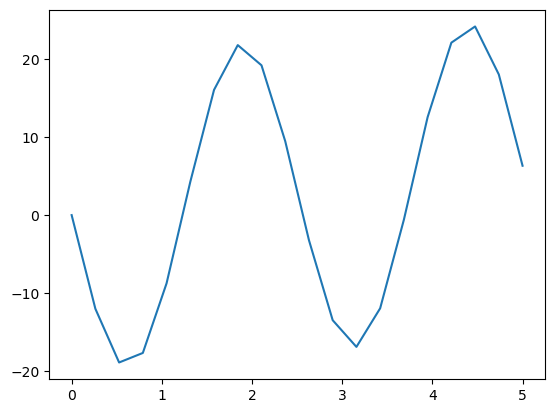

In [19]:
plt.plot(x, fx)
plt.show()

In [20]:
def error(params):
    return np.sum(np.abs(fx - func(x, params[0], params[1])))

#### `curv_fit()`

In [21]:
# analytical solving: y range is appr. 20, 
# period 2pi / (3.3 - 0.7)  and negative
guess = [np.log(20), - 2*np.pi / (3.3 - 0.7)]
guess

[2.995732273553991, -2.4166097335306103]

In [22]:
popt, pcov  = curve_fit(f= func, xdata= x, ydata= fx, p0= guess, method="lm" )
popt, pcov 

(array([ 3. , -2.5]),
 array([[ 2.68953106e-18, -5.23196225e-20],
        [-5.23196225e-20,  2.80481705e-19]]))

In [23]:
# sampling b
lstats = []
for kk in np.arange(-3, 3,.1):
        lstats.append((curve_fit(f= func, xdata= x, ydata= fx, p0= [np.log(20), kk],
            method= 'dogbox'), error([np.log(20),kk])))

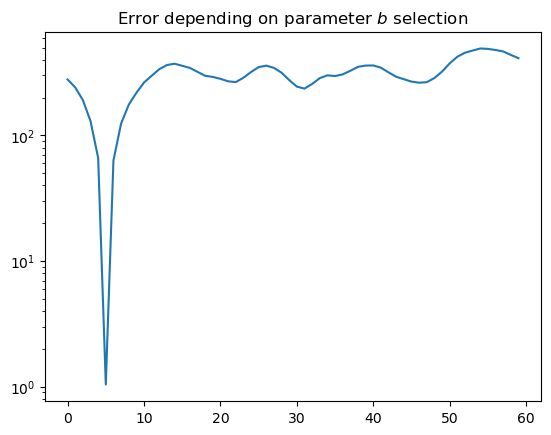

Best parameters: [ 3.  -2.5] 


In [24]:
plt.plot( np.arange(len(lstats)), [lstats[xx][1] for xx in range(len(lstats))] )
plt.title("Error depending on parameter $b$ selection")
plt.yscale('log');
plt.show()

min_error = min([lstats[xx][1] for xx in range(len(lstats))] )
iter_ = [xx for xx in range(len(lstats)) if lstats[xx][1] == min_error][0]
print(f'Best parameters: {lstats[iter_][0][0]} ')

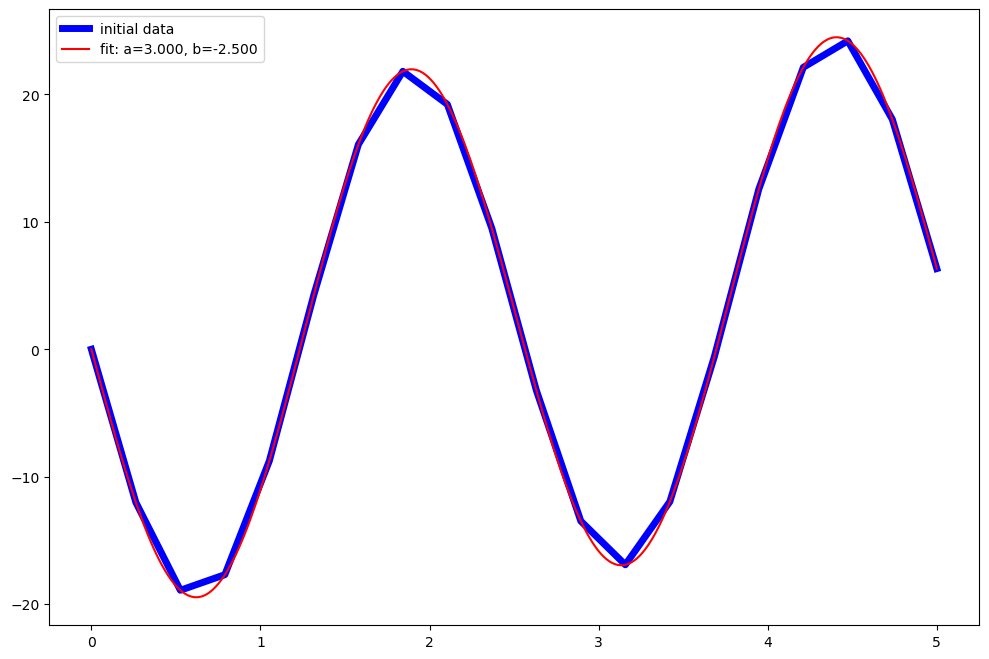

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue', label = 'initial data', linewidth = 5)
xx = np.linspace(0,5,300)
plt.plot(xx, func(xx, *popt), color='red',
     label= f'fit: a={popt[0]:5.3f}, b={popt[1]:5.3f}')
plt.legend()
plt.show()

#### `differential_evolution()`

In [26]:
bounds = [(-10, 10), (-10, 10)]
# bounds = [(2, 3), (-4, 0)]
# bounds = [(-math.inf, 3), (-4, 0)]
result = differential_evolution(func= error,  bounds=bounds,
                                seed=42, atol= 1e-10)#, popsize= 2, mutation= 1)
print(result)

print(f'\nBest parameters: {result.x} ')

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

Best parameters: [ 3.  -2.5] 


#### `differential_evolution() additional solution`

In [27]:
bounds = [(-100, 100), (-100, 100)]
result = differential_evolution(func= error,  bounds=bounds,
                                seed=42, atol= 1e-10)#, popsize= 2, mutation= 1)
print(result)

print(f'\nBest parameters: {result.x} ')

     fun: 3.098664949163776e-05
     jac: array([-31.64904464,  50.94922888])
 message: 'Optimization terminated successfully.'
    nfev: 405
     nit: 4
 success: True
       x: array([  2.99999999, -50.25220833])

Best parameters: [  2.99999999 -50.25220833] 


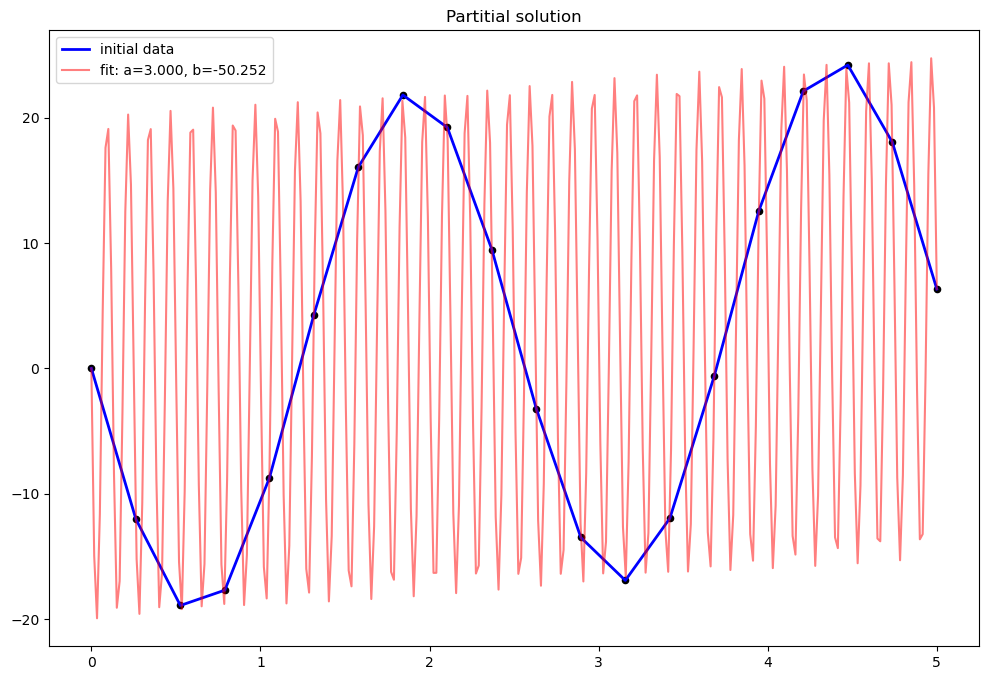

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue', label = 'initial data', linewidth = 2)
xx = np.linspace(0,5,300)
plt.plot(xx, func(xx, *result.x), color='red',
     label= f'fit: a={result.x[0]:5.3f}, b={result.x[1]:5.3f}', alpha= 0.5)
plt.scatter(x, func(x, *result.x), color='k', s=20)
plt.title("Partitial solution")
plt.legend()
plt.show()

This particular solution intercept all given x.

#### `mimimize()`

In [29]:
res_minimize = minimize(fun= error, x0=guess, method="COBYLA", tol= 1e-8)
print(res_minimize)
print(f'\nBest parameters: {res_minimize.x} ')

     fun: 3.576651754322313e-06
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 79
  status: 1
 success: True
       x: array([ 3. , -2.5])

Best parameters: [ 3.  -2.5] 


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [30]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

                     )

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [31]:
### YOUR CODE HERE
import scipy.spatial
ratings.shape

(10, 15)

#### `Cosine similarity using numpy`

In [32]:
similar = []

for r in range(ratings.shape[0]):
    temp_list = []  
    for rr in range(ratings.shape[0]):
        if r != rr:
            dotprod = np.dot(ratings[r],ratings[rr])
            euclidprod = np.sqrt(  sum(ratings[r]**2)  *  sum(ratings[rr]**2)  )
            temp_list.append( dotprod / euclidprod  )

            # scipy: more concise but slower
            # temp_list.append( 1- scipy.spatial.distance.cosine(raitings[rr],raitings[r])  )
        else:
            temp_list.append( 0)
    ind = temp_list.index(max(temp_list))
    similar.append([r + 1, ind +1 ])

similar

[[1, 9],
 [2, 5],
 [3, 10],
 [4, 10],
 [5, 9],
 [6, 10],
 [7, 4],
 [8, 6],
 [9, 1],
 [10, 3]]

#### Cosine similarity using `sklearn.pairwise_distances()`

In [33]:
from sklearn.metrics import pairwise_distances

for i, meth in enumerate(['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine',  'hamming', 'mahalanobis', 'minkowski',  'seuclidean', 'nan_euclidean']):
    dist = pairwise_distances(ratings, metric= meth)
#'euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski', 'nan_euclidean', 'haversine'
    cosine_sim = []
    for i in range(dist.shape[0]):
        cosine_sim.append([i + 1,
                           np.where (dist[i] ==
                (min([dist[ii][i] if i != ii else 100 for ii in range(10)] )) )[0][0] +1 ])
    print(meth.ljust(15),cosine_sim)

print('\n       hands-on'.ljust(15), similar )

euclidean       [[1, 9], [2, 5], [3, 10], [4, 8], [5, 2], [6, 8], [7, 4], [8, 4], [9, 1], [10, 3]]
l2              [[1, 9], [2, 5], [3, 10], [4, 8], [5, 2], [6, 8], [7, 4], [8, 4], [9, 1], [10, 3]]
l1              [[1, 9], [2, 5], [3, 10], [4, 8], [5, 2], [6, 8], [7, 4], [8, 4], [9, 1], [10, 3]]
manhattan       [[1, 9], [2, 5], [3, 10], [4, 8], [5, 2], [6, 8], [7, 4], [8, 4], [9, 1], [10, 3]]
cityblock       [[1, 9], [2, 5], [3, 10], [4, 8], [5, 2], [6, 8], [7, 4], [8, 4], [9, 1], [10, 3]]
braycurtis      [[1, 9], [2, 5], [3, 10], [4, 2], [5, 9], [6, 9], [7, 2], [8, 4], [9, 1], [10, 9]]
canberra        [[1, 9], [2, 5], [3, 10], [4, 8], [5, 9], [6, 2], [7, 8], [8, 4], [9, 1], [10, 9]]
chebyshev       [[1, 3], [2, 8], [3, 4], [4, 3], [5, 2], [6, 8], [7, 4], [8, 2], [9, 10], [10, 3]]
correlation     [[1, 9], [2, 5], [3, 10], [4, 7], [5, 2], [6, 8], [7, 4], [8, 6], [9, 1], [10, 3]]
cosine          [[1, 9], [2, 5], [3, 10], [4, 10], [5, 9], [6, 10], [7, 4], [8, 6], [9, 1], [10, 3]]
hamming 

Hands-on numpy legacy method is equivalent to sklearn "cosine" 